VII Auswertung mit Python
===

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log
from scipy.optimize import curve_fit

VII.1 Absorption von beta-Strahlung
---

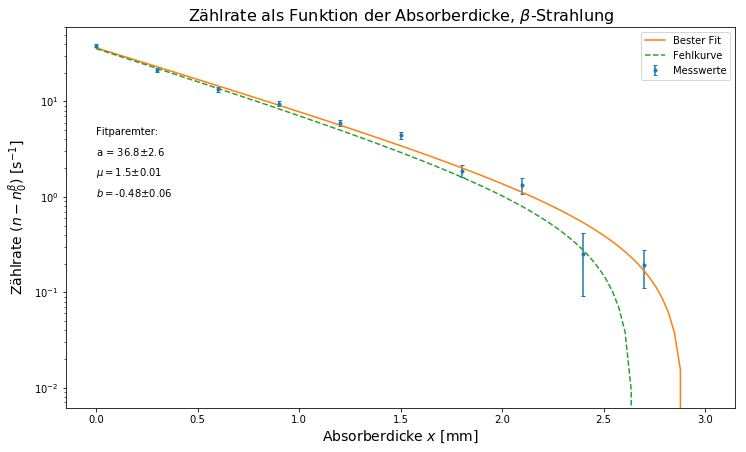

In [2]:
# Nulleffekt
t0 = 300 # in s
N0 = 90
n0 = N0 / t0

# Werte aus Tabelle 1
xb = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3, 3.3, 3.6,
             3.9, 4.9]) # Absorberdicke in mm
tb = np.array([30, 30, 30, 30, 30, 30, 30, 30, 30, 120, 120, 120, 120, 120, 
             300]) # Zeit in s
Nb = np.array([1169, 652, 414, 299, 194, 147, 71, 54, 22, 81, 62, 61, 47, 50,
             144]) # Impulse

# Werte
sig_Nb = sqrt(Nb) # Fehler der Impulse
nb = Nb / tb # Zählrate in s^-1
sig_nb = sig_Nb / tb
n0b = nb[-1] # Nulleffekt beta
sig_n0b = sig_nb[-1] 
zb = nb - n0b # Zählrate ohne Hintergrund
sig_zb = sqrt((sig_Nb / tb) ** 2 + (sig_n0b) ** 2) 

# Plot
plt.figure(figsize = (12,7))
plt.errorbar(xb[:-5], zb[:-5], yerr = sig_zb[:-5], fmt = '.', capsize = 2, 
             label = 'Messwerte') 
    # Alle Werte kleiner als 10^-2 wurden hier entfernt
plt.ylabel('Zählrate $(n - n_0^\\beta)$ [s$^{-1}]$', size = 14)
plt.xlabel('Absorberdicke $x$ [mm]', size = 14)
plt.title('Zählrate als Funktion der Absorberdicke, $\\beta$-Strahlung', 
          size = 16)
plt.yscale('log')


# Fit
def expo(x, a, mu, b):
    return a * exp(- mu * x) + b


popt, pcov = curve_fit(expo, xb[:-5], zb[:-5], sigma = sig_zb[:-5])
x = np.linspace(0, 3, 100)

plt.plot(x, expo(x, *popt), label = 'Bester Fit')
plt.text(0, exp(1.5), 'Fitparemter:')
plt.text(0, exp(1), 'a = ' + str(np.round(popt[0], 1)) + '$\pm$' 
         + str(np.round(pcov[0,0],2)))
plt.text(0, exp(0.5), '$\\mu = $' + str(np.round(popt[1], 2)) + '$\pm$' 
         + str(np.round(pcov[1,1],2)))
plt.text(0, exp(0), '$b = $' + str(np.round(popt[2], 2)) + '$\pm$' 
         + str(np.round(pcov[2,2],2)))

# Fehlerkurve
zb_f = zb - sig_zb # Maximale Ablenkung von der ursprünglichen Kurve
sig_zb_f = np.sqrt(np.abs(zb_f))
popt_f, pcov_f = curve_fit(expo, xb[:-5], zb_f[:-5], sigma = sig_zb_f[:-5])
x = np.linspace(0, 3, 100)

plt.plot(x, expo(x, *popt_f), label = 'Fehlkurve', ls = '--')
plt.legend(loc = 'best')

plt.savefig('images/253/V253Diagramm1.png')
plt.show()

In [3]:
# Maximale Reichweite
a = popt[0]
mu = popt[1]
b = popt[2]
a_f = popt_f[0]
mu_f = popt_f[1]
b_f = popt_f[2]

xmax = -1 / mu * log(np.abs(b / a))
xmax_f = -1 / mu_f * log(np.abs(b_f / a_f))
sig_xmax = xmax - xmax_f
print('maximale Reichweite xmax = ' + str(np.round(xmax,2)) + '(' 
      + str(np.round(sig_xmax,1)) + ')' + 'mm')

maximale Reichweite xmax = 2.9(0.3)mm


In [4]:
# Flächendichte Aluminium
rho_al = 2.7 # g / cm^-3
Rb_es = 0.130 # g / cm^-2

Rb_al = rho_al * (xmax * 10 ** -1) # 
sig_Rb_al = rho_al * (sig_xmax * 10 ** -1)

print(Rb_al)

0.7829525673407145


VII.2 Absorption von gamma-Strahlung
---

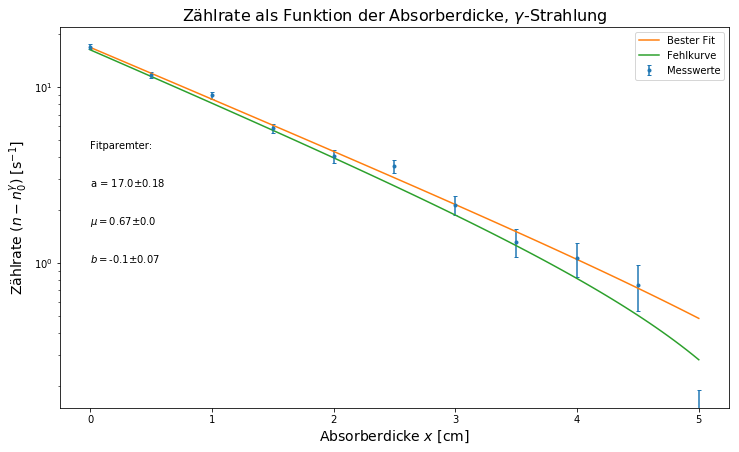

In [5]:
# Werte aus Tabelle 2
xg = np.linspace(0,5,11) # cm
tg = 60 * np.ones(11) # s
Ng = np.array([1085, 767, 606, 414, 307, 278, 193, 143, 128, 109, 64])

# Werte
sig_Ng = np.sqrt(Ng) # Fehler der Impulse
ng = Ng / tg # Zählrate in s^-1
sig_ng = sig_Ng / tg
n0g = ng[-1] # Nulleffekt gamma
sig_n0g = sig_ng[-1] 
zg = ng - n0g # Zählrate ohne Hintergrund
sig_zg = sqrt((sig_Ng / tg) ** 2 + (sig_n0g) ** 2) 

# Plot
plt.figure(figsize = (12,7))
plt.errorbar(xg[:], zg[:], yerr = sig_zg[:], fmt = '.', capsize = 2, 
             label = 'Messwerte') 
plt.ylabel('Zählrate $(n - n_0^\\gamma)$ [s$^{-1}]$', size = 14)
plt.xlabel('Absorberdicke $x$ [cm]', size = 14)
plt.title('Zählrate als Funktion der Absorberdicke, $\\gamma$-Strahlung', 
          size = 16)
plt.yscale('log')

# Fit
popt, pcov = curve_fit(expo, xg[:-1], zg[:-1], sigma = sig_zg[:-1])
x = np.linspace(0, 5, 100)

plt.plot(x, expo(x, *popt), label = 'Bester Fit')
plt.text(0, exp(1.5), 'Fitparemter:')
plt.text(0, exp(1), 'a = ' + str(np.round(popt[0], 1)) + '$\pm$' 
         + str(np.round(pcov[0,0],2)))
plt.text(0, exp(0.5), '$\\mu = $' + str(np.round(popt[1], 2)) + '$\pm$' 
         + str(np.round(pcov[1,1],2)))
plt.text(0, exp(0), '$b = $' + str(np.round(popt[2], 2)) + '$\pm$' 
         + str(np.round(pcov[2,2],2)))

# Fehlerkurve
zg_f = zg - sig_zg # Maximale Ablenkung von der ursprünglichen Kurve
sig_zg_f = np.sqrt(np.abs(zg_f))
popt_f, pcov_f = curve_fit(expo, xg[:-1], zg_f[:-1], sigma = sig_zg_f[:-1])
x = np.linspace(0, 5, 100)

plt.plot(x, expo(x, *popt_f), label = 'Fehlkurve')
plt.legend(loc = 'best')

plt.savefig('images/253/V253Diagramm2.png')
plt.show()

In [6]:
# Schwächungskoeffizient
mu = popt[1]
mu_f = popt_f[1]
sig_mu = np.abs(popt[1]-popt_f[1])

print('Schwächungskoeffizient: mu = ' + str(np.round(mu,2)) + '(' 
      + str(np.round(sig_mu,2)) + ') / cm')

rho_Pb = 11.34 # g cm^-3

mu_rho = mu / rho_Pb
sig_mu_rho = sig_mu / rho_Pb
print('Massenschwähungskoeffizient mu / rho = ' + str(np.round(mu_rho,3)) 
      + '(' + str(np.round(sig_mu_rho,3)) + ')' )

Schwächungskoeffizient: mu = 0.67(0.01) / cm
Massenschwähungskoeffizient mu / rho = 0.059(0.001)


VII.3 Bestimmung der Aktivität
---

In [16]:
# Werte Tabelle 3
dg = np.array([5, 10, 20]) # cm
sig_dg = 0.2 * np.ones(3) 
tg = np.array([60, 60, 60]) # s
Ng = np.array([9074, 3472, 1145]) 
sig_Ng = sqrt(Ng)
ng = Ng / tg # s^-1
sig_ng = sig_Ng / tg

r = 0.7 # cm
d = 5 # cm
sig_d = 0.2 # cm
eps = 0.04

A = 1 / 2 * (4 * ng * dg ** 2) / (eps * r ** 2) # s^-1 
'''Präparat zerfällt in 2 Photonen, weshalb 2 Messungen pro Zerfall
detektiert werden. Daher der Faktor /2'''
sig_A = 2 / (eps * r ** 2) * sqrt( (sig_ng * dg ** 2) ** 2 
                                  + (ng * 2 * sig_dg * dg) ** 2 )

print('A1 = ' + str(np.round(A[0],-3)) + '(' + str(np.round(sig_A[0],-3)) + ')' )
print('A2 = ' + str(np.round(A[1],-3)) + '(' + str(np.round(sig_A[1],-3)) + ')' )
print('A3 = ' + str(np.round(A[2],-3)) + '(' + str(np.round(sig_A[2],-3)) + ')' )

A1 = 386000.0(31000.0)
A2 = 590000.0(26000.0)
A3 = 779000.0(28000.0)


Raumwinkel-Korrektur

In [18]:
# Werte
l = 4 # cm

# Korrektur
A_korr = 1 / 2 *(4 * ng * (dg + l / 2) ** 2) / (eps * r ** 2) # dg, l, r in cm
sig_A_korr = 2 / (eps * r ** 2) * sqrt( (sig_ng * (dg + l / 2) ** 2) ** 2 
                                       + (ng * 2 * (dg + l / 2) * sig_dg ) ** 2)

print('A1_korr = ' + str(np.round(A_korr[0],-3)) + '(' + str(np.round(sig_A_korr[0],-3)) + ')' )
print('A2_korr = ' + str(np.round(A_korr[1],-3)) + '(' + str(np.round(sig_A_korr[1],-3)) + ')' )
print('A2_korr = ' + str(np.round(A_korr[2],-3)) + '(' + str(np.round(sig_A_korr[2],-3)) + ')' )

A1_korr = 756000.0(44000.0)
A2_korr = 850000.0(32000.0)
A2_korr = 942000.0(33000.0)


Absorptions-Korrektur

In [23]:
rho_abs = 7.9 # g cm^-3
mu_abs = (mu / rho_Pb) * rho_abs
sig_mu_abs = sig_mu / rho_Pb * rho_abs
x = 0.14 # cm

A_korr_korr = A_korr * exp(-mu_abs * x)
sig_A_korr_korr = sqrt( (sig_A_korr * exp(-mu_abs * x)) ** 2 
                       + (A_korr * x * sig_mu_abs * exp(-mu_abs * x)) ** 2 )

print('A1_korr_korr = ' + str(np.round(A_korr_korr[0],-4)) + '(' 
      + str(np.round(sig_A_korr_korr[0],-4)) 
      + ')', ' k_2 = ' + str(np.round(A_korr[0] / A_korr_korr[0],2)) )
print('A2_korr_korr = ' + str(np.round(A_korr_korr[1],-4)) + '(' 
      + str(np.round(sig_A_korr_korr[1],-4)) + ')')
print('A3_korr_korr = ' + str(np.round(A_korr_korr[2],-4)) + '(' 
      + str(np.round(sig_A_korr_korr[2],-4)) + ')')

A1_korr_korr = 710000.0(40000.0)  k_2 = 1.07
A2_korr_korr = 800000.0(30000.0)
A3_korr_korr = 880000.0(30000.0)


Theoretische Aktivität

In [20]:
# Herstellerangaben
T_12 = 5.27 # Halbwertszeit in Jahre
A01 = 3700000 # Aktivität in s^-1
A02 = 1150000

t1 = 9.79 # Zeit seit Herstellung in Jahre
t2 = 0.87

A_theo_1 = A01 * exp(-log(2) * (t1 / T_12))
A_theo_2 = A02 * exp(-log(2) * (t2 / T_12))
A_theo = (A_theo_1 + A_theo_2) / 2
sig_A_theo = np.abs(A_theo_2 - A_theo_1)
print('A_theo =', np.round(A_theo,-3), '+/-', np.round(sig_A_theo,-3))

# Probe:
t_010121 = 8.97
A_theo_010121 = A01 * exp(-log(2) * (t_010121 / T_12))
print('A_theo_010121 =', np.round(A_theo_010121,-3))
print('A_theo_010121 / A_02 =', A_theo_010121 / A02)

A_theo = 1023000.0 +/- 5000.0
A_theo_010121 = 1137000.0
A_theo_010121 / A_02 = 0.98883665137221


VII.4 Absorption von Alpha-Strahlung
---

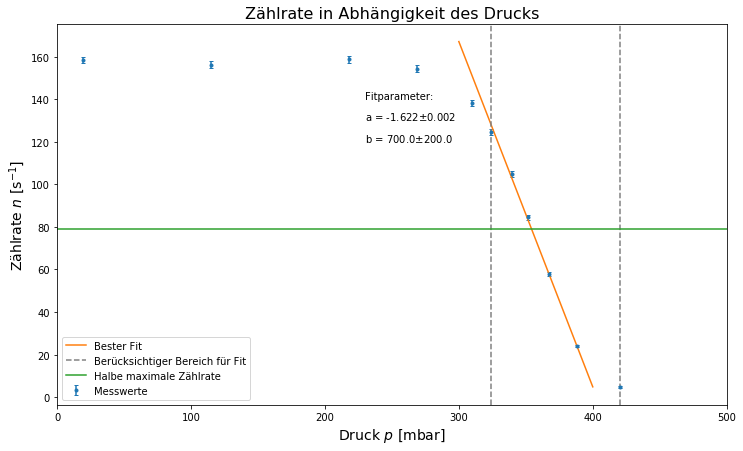

In [11]:
# Werte aus Tabelle 4
pa = np.array([19, 115, 218, 269, 310, 324, 340, 352, 367, 388, 420])
ta = np.ones(11) * 60
Na = np.array([9505, 9375, 9521, 9259, 8288, 7474, 6296, 5077, 3464, 1447, 290])
sig_Na = sqrt(Na)
na = Na / ta
sig_na = sig_Na / ta

# Fit
def line(x, a, b):
    return a * x + b


popt, pcov = curve_fit(line, pa[5:-1], na[5:-1], sigma = sig_na[5:-1])
x = np.linspace(300,400,10)

# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(pa, na, yerr = sig_na, fmt = '.', capsize = 2, label = 'Messwerte')
plt.plot(x, line(x, *popt), label = 'Bester Fit')
plt.text(230, 140, 'Fitparameter:')
plt.text(230, 130, 'a = ' + str(np.round(popt[0],3)) + '$\pm$' + str(np.round(pcov[0,0],3)))
plt.text(230, 120, 'b = ' + str(np.round(popt[1],-2)) + '$\pm$' + str(np.round(pcov[1,1],-2)))
plt.ylabel('Zählrate $n$ [s$^{-1}]$', size = 14)
plt.xlabel('Druck $p$ [mbar]', size = 14)
plt.axvline(pa[5], label = 'Berücksichtiger Bereich für Fit', ls = '--', color = 'gray')
plt.axvline(pa[-1], ls = '--', color = 'gray')
plt.xlim(0,500)
plt.title('Zählrate in Abhängigkeit des Drucks', size = 16)

plt.plot([0, 1e3], 2 * [0.5 * na[0]], label = 'Halbe maximale Zählrate')

plt.legend(loc = 'best')
plt.savefig('images/253/V253Diagramm3.png')
plt.show()

In [12]:
#Schnittpunkt
print(popt, pcov)
p_halb = (0.5 * pa[0] - popt[1]) / popt[0] 
sig_p_halb = sqrt( (pcov[1,1] / popt[0]) ** 2 + ((0.5 * pa[0] - popt[1]) 
                                            * pcov[0,0] / (popt[0] ** 2)) ** 2)

print('Halbdruck: p_halb = ' + str(np.round(p_halb,-1)) + '(' 
      + str(np.round(sig_p_halb,-1)) + ')')

[ -1.62189123 653.62197753] [[ 1.76777202e-03 -6.50596892e-01]
 [-6.50596892e-01  2.40295590e+02]]
Halbdruck: p_halb = 400.0(150.0)


In [13]:
# Reichweite
s0 = 3.95 # cm
sig_s0 = 0.05 # cm
p0 = 1013 # mbar


s1 = p_halb / p0 * s0 # Reichweite bei Halbdruck
sig_s1 = sqrt( (sig_p_halb / p0 * s0) ** 2 + (p_halb / p0 * sig_s0) ** 2)

print('Reichweite: s1 = ' + str(np.round(s1,1)) + '(' 
      + str(np.round(sig_s1,1)) + ')')

# Korrektur
rho_Gl = 2.25 # mg cm^-2
s2 = rho_Gl / 1.43 # cm


s3 = 0.68 # cm

s_ges = s1 + s2 + s3
sig_s_ges = sig_s1
print('Reichweite mit Korrekturen: s_ges = ' + str(np.round(s_ges,1)) + '(' 
      + str(np.round(sig_s_ges,1)) + ')')

Reichweite: s1 = 1.5(0.6)
Reichweite mit Korrekturen: s_ges = 3.8(0.6)
